### Load required libraries

In [1]:
import numpy as np
import math
import scipy
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import ndimage
from scipy import signal
from scipy.ndimage import gaussian_filter
from keras import regularizers
import cv2
import tensorflow as tf

from keras.layers import Conv2D, BatchNormalization, Activation , MaxPooling2D, UpSampling2D 
from keras.models import Model, Input
from keras.optimizers import Adam
from keras import initializers
from keras import optimizers
import keras.backend as K
from keras.models import load_model
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
from utils.load_train_val import *
from utils.models import *

Using TensorFlow backend.


### Load the dataset

In [2]:
X_train,Y_train,X_val,Y_val = load_dataset(filename = 'gray_scale.npy',kernelfile = 'kernel1.mat',
                                           val_percent = 0.04,resize_outs=False,add_noise = True)


images loaded
convolution done
Xtrain shape:  (24000, 128, 128)
Ytrain shape:  (24000, 128, 128)
Xval shape:  (1000, 128, 128)
Yval shape:  (1000, 128, 128)


### Visualize examples

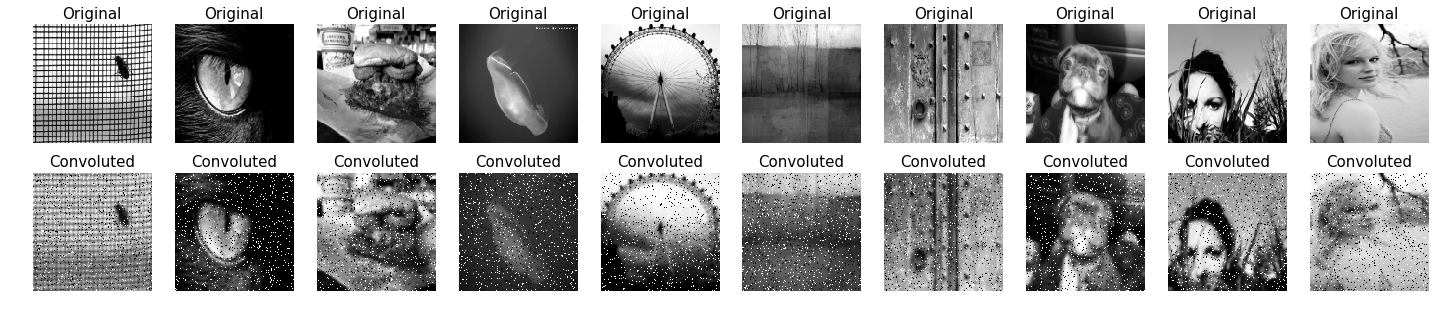

In [3]:
f, ax = plt.subplots(2,10,figsize=(25,5))
for i in range(10):
    ax[0,i].imshow((Y_val[i,:,:,0]*255).astype('uint8'),cmap = 'gray');  ax[0,i].axis('Off'); ax[0,i].set_title('Original', size=15)
    ax[1,i].imshow((X_val[i,:,:,0]*255).astype('uint8'),cmap = 'gray');  ax[1,i].axis('Off'); ax[1,i].set_title('Convoluted', size=15)
plt.show()

### Training

In [4]:

# load the model
model = model_cnn_BN_uniform(lr = 0.0005,loss_type = 'mean_squared_error',reg_lambda = 0.001)

#create log of the training
tbCallBack = keras.callbacks.TensorBoard(log_dir='./logs/model_cnn_BN_uniform_sigma1_addnoise', 
                                         histogram_freq=0, write_graph=True, write_images=True)

# reduce lr with respect val loss while training
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=10, min_lr=0.0001)
#save the models
model_check = ModelCheckpoint('./models/model_cnn_BN_uniform_sigma1_addnoise/weights.{epoch:02d}-{val_loss:.3f}.hdf5', 
                              monitor='val_loss', verbose=0, save_best_only=False, 
                                save_weights_only=False, mode='auto', period=1)


# load already trained model

#model = load_model('./models/mse_randominitkernel_model2_batchnorm_lr0.0005/weights.29-0.01.hdf5')
# train the model


initial_epoch=0
model.fit(X_train, Y_train,
                epochs= 50,
                batch_size=64,
                shuffle=True,
                initial_epoch = initial_epoch,
                validation_data=(X_val, Y_val),
                callbacks=[tbCallBack,reduce_lr,model_check])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 16)      64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 16)      2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 16)      64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 16)      2320      
_________________________________________________________________
batch_normalization_3 (Batch (None, 128, 128, 16)      64        
__________

KeyboardInterrupt: 

### Run Inference

In [5]:
#load saved model
#model = load_model('/home/ecbm4040/Deep-Learning-for-SBD/models/CNN_BN_init_corrected_uniform_sigma1/weights.14-0.001.hdf5')
#
# predict on val data
pred = model.predict(X_val)

### Visualize Results

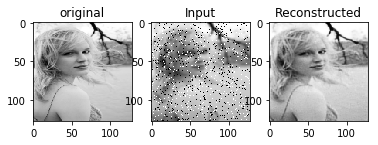

In [6]:
plt.subplot(1,3,1)
plt.imshow((Y_val[9,:,:,0]*255.0).astype('uint8'),cmap = 'gray')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow((X_val[9,:,:,0]*255.0).astype('uint8'),cmap = 'gray')
plt.title('Input')
plt.subplot(1,3,3)
plt.imshow((pred[9,:,:,0]*255.0).astype('uint8'),cmap = 'gray');
plt.title('Reconstructed');


In [ ]:
plt.subplot(1,3,1)
plt.imshow((Y_val[15,:,:,0]*255.0).astype('uint8'),cmap = 'gray')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow((X_val[15,:,:,0]*255.0).astype('uint8'),cmap = 'gray')
plt.title('Input')
plt.subplot(1,3,3)
plt.imshow((pred[15,:,:,0]*255.0).astype('uint8'),cmap = 'gray');
plt.title('Reconstructed');

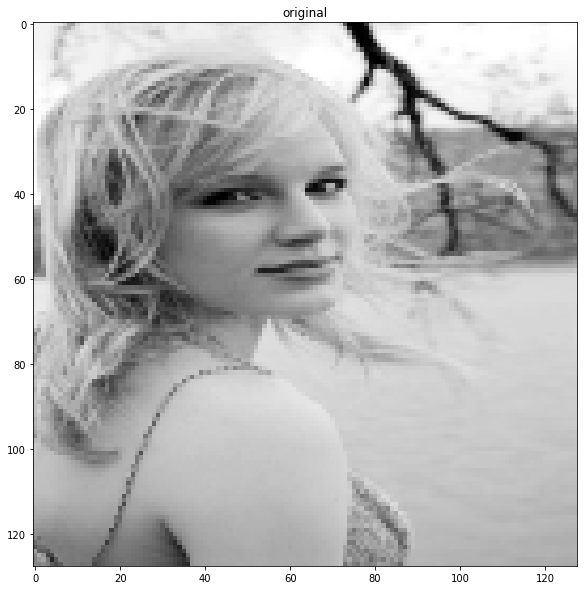

In [10]:
plt.figure(figsize = (10,10))
plt.imshow((Y_val[9,:,:,0]*255.0).astype('uint8'),cmap = 'gray')
plt.title('original')

plt.savefig('original_sigma1.jpg')

Text(0.5,1,'Reconstructed')

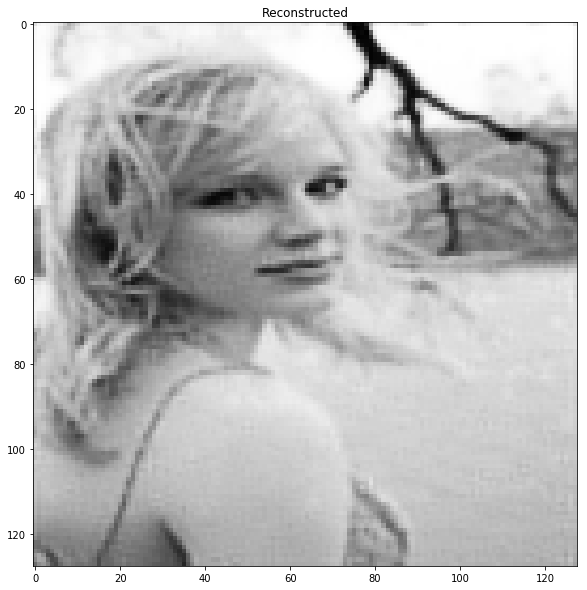

In [13]:
plt.figure(figsize = (10,10))
plt.imshow((pred[9,:,:,0]*255.0).astype('uint8'),cmap = 'gray');
plt.title('Reconstructed')
#plt.savefig('Reconstructedsigma1')

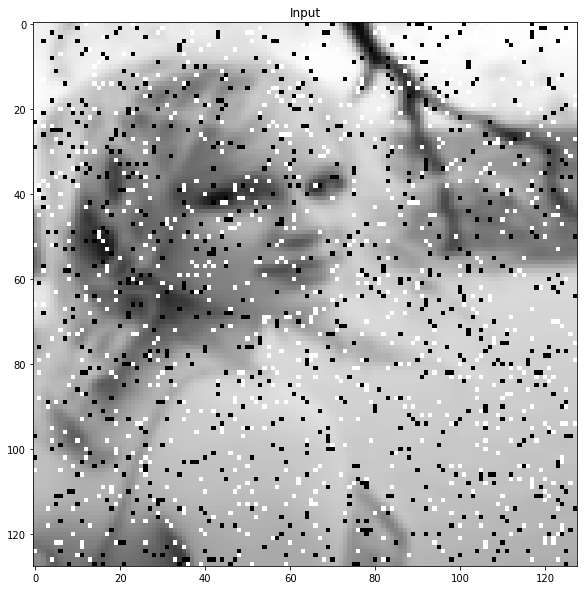

In [14]:
plt.figure(figsize = (10,10))
plt.imshow((X_val[9,:,:,0]*255.0).astype('uint8'),cmap = 'gray')
plt.title('Input')
plt.savefig('Inputsigma1')